In [1]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 2.4 MB/s eta 0:00:00


In [2]:
!pip install streamlit pandas numpy seaborn matplotlib plotly

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import streamlit as st

In [8]:
day_df = pd.read_csv("https://raw.githubusercontent.com/spedakudashboard91/biiike/main/data/day_dataset_bike_sharing.csv")


In [9]:
if 'instant' in day_df.columns:
    day_df.drop(columns=['instant'], inplace=True)
else:
    print("Column 'instant' not found in DataFrame.")

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [10]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [11]:
day_df['weekday'] = day_df['dteday'].dt.day_name()  # Changed 'dateday' to 'dteday'
day_df['year'] = day_df['dteday'].dt.year  # Changed 'dateday' to 'dteday'

# Season column (no change needed)
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

# Weathersit column (no change needed)
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year
0,2011-01-01,Spring,0,1,0,Saturday,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,2011
1,2011-01-02,Spring,0,1,0,Sunday,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801,2011
2,2011-01-03,Spring,0,1,0,Monday,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011
3,2011-01-04,Spring,0,1,0,Tuesday,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011
4,2011-01-05,Spring,0,1,0,Wednesday,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011


In [12]:
# Resampling data based on month and calculating total rides
monthly_rent_df = day_df.resample(rule='M', on='dteday').agg({ # Changed 'dateday' to 'dteday'
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum" # Changed 'count' to 'cnt' for total rides
})

# Change index format to month-year (Jan-20, Feb-20, etc.)
monthly_rent_df.index = monthly_rent_df.index.strftime('%b-%y')
monthly_rent_df = monthly_rent_df.reset_index()

# Rename columns
monthly_rent_df.rename(columns={
    "dteday": "yearmonth", # Changed 'dateday' to 'dteday'
    "cnt": "total_rides", # Changed 'count' to 'cnt' for total rides
    "casual": "casual_rides",
    "registered": "registered_rides"
}, inplace=True)

monthly_rent_df

<ipython-input-12-5d2bd3871361>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_rent_df = day_df.resample(rule='M', on='dteday').agg({ # Changed 'dateday' to 'dteday'


,yearmonth,casual_rides,registered_rides,total_rides
0,Jan-11,3073,35116,38189
1,Feb-11,6242,41973,48215
2,Mar-11,12826,51219,64045
3,Apr-11,22346,72524,94870
4,May-11,31050,104771,135821
5,Jun-11,30612,112900,143512
6,Jul-11,36452,104889,141341
7,Aug-11,28842,107849,136691
8,Sep-11,26545,100873,127418
9,Oct-11,25222,98289,123511


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the correct dataset for total rentals (day_dataset.csv)
day_df = pd.read_csv("https://raw.githubusercontent.com/spedakudashboard91/biiike/main/data/day_dataset_bike_sharing.csv")  # Adjust the path as necessary

# Extract the month from the 'dteday' column
day_df['month'] = pd.to_datetime(day_df['dteday']).dt.month

# Grouping bike renters (casual and registered) data by month
grouped_by_month = day_df.groupby('month')

# Calculating aggregate statistics for each month
aggregated_stats_by_month = grouped_by_month['cnt'].agg(['max', 'min', 'mean', 'sum']) # Changed 'count' to 'cnt' to match the actual column name
aggregated_stats_by_month

,max,min,mean,sum
month,,,,
1,4521,431,2176.338710,134933
2,5062,1005,2655.298246,151352
3,8362,605,3692.258065,228920
4,7460,795,4484.900000,269094
5,8294,2633,5349.774194,331686
6,8120,3767,5772.366667,346342
7,8173,3285,5563.677419,344948
8,7865,1115,5664.419355,351194
9,8714,1842,5766.516667,345991


In [14]:
# Grouping bike renters (casual and registered) data by weather
grouped_by_weather = day_df.groupby('weathersit')

# Calculating aggregate statistics for each weather type
# Changed 'count' to 'cnt' to match the actual column name in the dataset
aggregated_stats_by_weather = grouped_by_weather['cnt'].agg(['max', 'min', 'mean', 'sum'])
aggregated_stats_by_weather

,max,min,mean,sum
weathersit,,,,
1,8714,431,4876.786177,2257952
2,8362,605,4035.862348,996858
3,4639,22,1803.285714,37869


In [15]:
# Grouping bike renters (casual and registered) data by holiday
grouped_by_holiday = day_df.groupby('holiday')

# Calculating aggregate statistics for each holiday condition
# Changed 'count' to 'cnt' to match the actual column name in the dataset
aggregated_stats_by_holiday = grouped_by_holiday['cnt'].agg(['max', 'min', 'mean', 'sum'])
aggregated_stats_by_holiday

,max,min,mean,sum
holiday,,,,
0,8714,22,4527.104225,3214244
1,7403,1000,3735.000000,78435


In [16]:
# Comparing the number of bike renters on weekdays and weekends
grouped_by_weekday = day_df.groupby('weekday')

# Calculating aggregate statistics for the number of bike renters on weekdays and weekends
# Changed 'count' to 'cnt' to match the actual column name for total rentals
aggregated_stats_by_weekday = grouped_by_weekday['cnt'].agg(['max', 'min', 'mean'])
aggregated_stats_by_weekday

,max,min,mean
weekday,,,
0,8227,605,4228.828571
1,7525,22,4338.123810
2,7767,683,4510.663462
3,8173,441,4548.538462
4,7804,431,4667.259615
5,8362,1167,4690.288462
6,8714,627,4550.542857


In [17]:
# Grouping bike rental data by season
grouped_by_season = day_df.groupby('season')

# Calculating the average number of casual and registered bike rentals, as well as aggregate statistics for total bike rentals
# Changed 'count' to 'cnt' to match the actual column name for total rentals
aggregated_stats_by_season = grouped_by_season.agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': ['max', 'min', 'mean']  # Corrected column name here
})
aggregated_stats_by_season

casual   registered   cnt                   
               mean         mean   max   min         mean
season                                                   
1        334.928177  2269.204420  7836   431  2604.132597
2       1106.097826  3886.233696  8362   795  4992.331522
3       1202.611702  4441.691489  8714  1115  5644.303191
4        729.112360  3999.050562  8555    22  4728.162921

In [18]:
# Grouping data by season and calculating aggregate statistics for temperature variables (temp),
# perceived temperature (atemp),
# and humidity (hum)
aggregated_stats_by_season = day_df.groupby('season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'hum': ['max', 'min', 'mean']
})
aggregated_stats_by_season

temp                         atemp                           hum  \
             max       min      mean       max       min      mean       max   
season                                                                         
1       0.572500  0.059130  0.297748  0.548617  0.079070  0.296914  0.948261   
2       0.808333  0.253043  0.544405  0.757579  0.250339  0.520307  0.922500   
3       0.861667  0.469167  0.706309  0.840896  0.242400  0.655898  0.939565   
4       0.657500  0.220833  0.422906  0.607975  0.227913  0.415539  0.972500   

                            
             min      mean  
season                      
1       0.000000  0.582903  
2       0.254167  0.626948  
3       0.360000  0.633482  
4       0.333478  0.668719

In [25]:
import logging

# Set the logging level for Streamlit to ERROR to suppress warnings
logging.getLogger("streamlit").setLevel(logging.ERROR)

st.sidebar.header("Filter Data")
start_date = st.sidebar.date_input('Mulai dari', pd.to_datetime(day_df['dteday']).min()) # Changed 'data' to 'day_df'
end_date = st.sidebar.date_input('Sampai dengan', pd.to_datetime(day_df['dteday']).max()) # Changed 'data' to 'day_df'

day_df['dteday'] = pd.to_datetime(day_df['dteday'])
filtered_data = day_df[(day_df['dteday'] >= pd.to_datetime(start_date)) & (day_df['dteday'] <= pd.to_datetime(end_date))] # Changed 'data' to 'day_df'

2024-12-29 20:12:22.157 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 20:12:22.160 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 20:12:22.166 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 20:12:22.168 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 20:12:22.171 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 20:12:22.173 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 20:12:22.175 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 20:12:22.180 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [26]:
st.set_page_config(page_title=" analisa Bike Sharing Dashboard", layout="wide")

st.title('🚲 Bike Sharing Dashboard')
st.markdown("Welcome to  **Bike Sharing Dashboard**! Di sini Anda bisa melihat analisis penyewaan sepeda berdasarkan berbagai faktor seperti hari kerja, hari libur, dan kondisi cuaca.")

st.markdown("""
### Insight:
- **Pertanyaan Bisnis ke 1**:Bagaimana perkembangan jumlah penyewaan sepeda dari tahun ke tahun?

- **Pertanyaan Bisnis ke 2** :Sejauh mana faktor cuaca berpengaruh terhadap tingkat penggunaan sepeda oleh pengguna?

- ** Pertanyaan Bisnis ke 3** :Apa perbedaan pola penggunaan sepeda pada hari kerja, hari libur, dan hari biasa?

- ** Pertanyaan Bisnis ke 4** :Apakah terdapat hubungan antara suhu udara dan tingkat penyewaan sepeda yang tinggi?
""")

2024-12-29 20:12:37.119 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 20:12:37.122 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 20:12:37.125 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 20:12:37.129 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 20:12:37.135 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 20:12:37.138 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 20:12:37.146 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [28]:
# Membagi layar menjadi 3 kolom
col1, col2, col3 = st.columns(3)

# Menampilkan total rides di kolom pertama
with col1:
    # Use 'day_df' instead of 'main_df' to access the bike-sharing data
    total_all_rides = day_df['cnt'].sum()  # Also corrected 'count' to 'cnt'
    st.metric("Total Rides", value=total_all_rides)

# Menampilkan total casual rides di kolom kedua
with col2:
    # Use 'day_df' instead of 'main_df'
    total_casual_rides = day_df['casual'].sum()
    st.metric("Total Casual Rides", value=total_casual_rides)

# Menampilkan total registered rides di kolom ketiga
with col3:
    # Use 'day_df' instead of 'main_df'
    total_registered_rides = day_df['registered'].sum()
    st.metric("Total Registered Rides", value=total_registered_rides)

# Menampilkan pemisah horizontal
st.markdown("---")

2024-12-29 20:13:26.923 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 20:13:26.929 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 20:13:26.933 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 20:13:26.935 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 20:13:26.939 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 20:13:26.941 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 20:13:26.943 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 20:13:26.945 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # Import plotly.express

# Load the correct dataset for total rentals (day_dataset.csv)
day_df = pd.read_csv("https://raw.githubusercontent.com/spedakudashboard91/biiike/main/data/day_dataset_bike_sharing.csv")  # Adjust the path as necessary

# Extract the month from the 'dteday' column
day_df['month'] = pd.to_datetime(day_df['dteday']).dt.month

# Grouping bike renters (casual and registered) data by month
grouped_by_month = day_df.groupby('month')

# Calculating aggregate statistics for each month
aggregated_stats_by_month = grouped_by_month['cnt'].agg(['max', 'min', 'mean', 'sum']) # Changed 'count' to 'cnt' to match the actual column name


# Create a bar plot to visualize the aggregated statistics using Plotly Express
fig = px.bar(x=aggregated_stats_by_month.index, y=aggregated_stats_by_month['sum'],
             labels={'x': 'Month', 'y': 'Total Rentals'},
             title='Total Bike Rentals by Month')

# Update the layout for better visualization
fig.update_layout(xaxis_title='', yaxis_title='Total Rentals',
                  xaxis=dict(showgrid=False, showline=True, linecolor='rgb(204, 204, 204)', linewidth=2, mirror=True,
                             tickvals=aggregated_stats_by_month.index, # Set tick values to month numbers
                             ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']), # Set tick text to month names
                  yaxis=dict(showgrid=False, zeroline=False, showline=True, linecolor='rgb(204, 204, 204)', linewidth=2, mirror=True),
                  plot_bgcolor='rgba(255, 255, 255, 0)',
                  showlegend=True,
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))

# Display the plot
st.plotly_chart(fig, use_container_width=True)

2024-12-29 20:14:12.162 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 20:14:12.164 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 20:14:12.167 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 20:14:12.169 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

<ipython-input-32-da938e1220e2>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




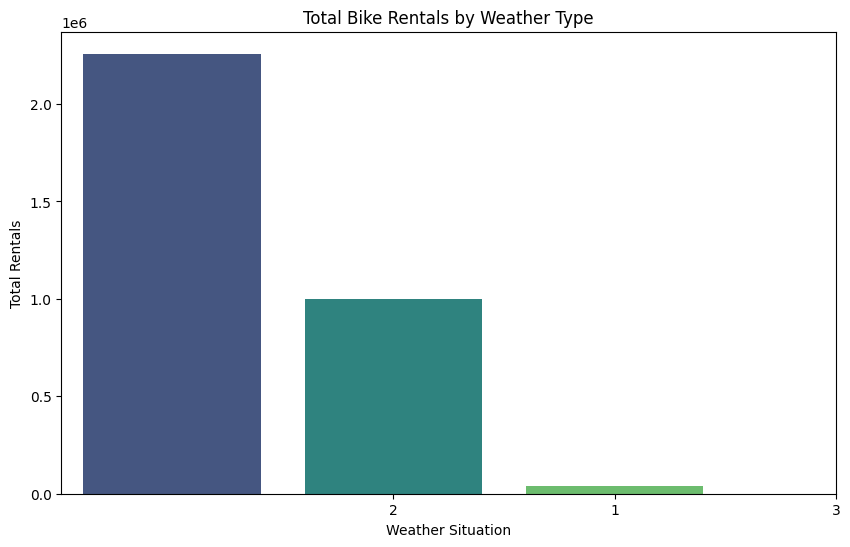

In [32]:
# Grouping bike renters (casual and registered) data by weather
grouped_by_weather = day_df.groupby('weathersit')

# Calculating aggregate statistics for each weather type
aggregated_stats_by_weather = grouped_by_weather['cnt'].agg(['max', 'min', 'mean', 'sum'])

# Create a bar plot to visualize the aggregated statistics by weather
plt.figure(figsize=(10, 6))
sns.barplot(x=aggregated_stats_by_weather.index, y=aggregated_stats_by_weather['sum'], palette='viridis')
plt.title('Total Bike Rentals by Weather Type')
plt.xlabel('Weather Situation')
plt.ylabel('Total Rentals')

# Get the actual weather descriptions from your data
weather_descriptions = day_df['weathersit'].unique()

# Set the x-axis tick labels using the actual weather descriptions
plt.xticks(aggregated_stats_by_weather.index, weather_descriptions)

plt.show()

In [34]:
# Plot for working day
fig1 = px.box(day_df, x='workingday', y='cnt', color='workingday', # Changed 'count' to 'cnt'
              title='Bike Rental Clusters by Working Day',
              labels={'workingday': 'Working Day', 'cnt': 'Total Rentals'}, # Changed 'count' to 'cnt'
              color_discrete_sequence=['#00FFFF', '#FF00FF', '#FFFF00', '#00FF00', '#FF0000'])
fig1.update_xaxes(title_text='Working Day')
fig1.update_yaxes(title_text='Total Rentals')

In [36]:
# Plot for holiday
fig2 = px.box(day_df, x='holiday', y='cnt', color='holiday', # Changed 'count' to 'cnt'
              title='Bike Rental Clusters by Holiday',
              labels={'holiday': 'Holiday', 'cnt': 'Total Rentals'}, # Changed 'count' to 'cnt' in labels
              color_discrete_sequence=['#00FFFF', '#FF00FF', '#FFFF00', '#00FF00', '#FF0000'])
fig2.update_xaxes(title_text='Holiday')
fig2.update_yaxes(title_text='Total Rentals')

In [38]:
# Plot for weekday
fig3 = px.box(day_df, x='weekday', y='cnt', color='weekday', # Changed 'count' to 'cnt'
              title='Bike Rental Clusters by Weekday',
              labels={'weekday': 'Weekday', 'cnt': 'Total Rentals'}, # Changed 'count' to 'cnt' in labels
              color_discrete_sequence=['#00FFFF', '#FF00FF', '#FFFF00', '#00FF00', '#FF0000'])
fig3.update_xaxes(title_text='Weekday')
fig3.update_yaxes(title_text='Total Rentals')

In [39]:
# Grouping data by season and calculating the total registered and casual usages
seasonal_usage = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

# Creating a bar plot
fig = px.bar(seasonal_usage, x='season', y=['registered', 'casual'],
             title='Bike Rental Counts by Season',
             labels={'season': 'Season', 'value': 'Total Rentals', 'variable': 'User Type'},
             color_discrete_sequence=["#00FF00","#0000FF"], barmode='group')

# Displaying the plot
st.plotly_chart(fig, use_container_width=True)
st.caption('Copyright (c), created by Dora Leonny Giselle')

2024-12-29 20:17:40.601 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 20:17:40.607 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 20:17:40.613 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 20:17:40.618 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 20:17:40.624 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 20:17:40.634 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [40]:
%%writefile app.py
import streamlit as st

Writing app.py


In [41]:
#Buat script untuk menjalankan Streamlit:
%%writefile run_streamlit.sh
streamlit run app.py & npx localtunnel --port 8501

Writing run_streamlit.sh


In [42]:
#Jalankan aplikasi
# Sel untuk menjalankan Streamlit
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.169.39.207:8501

  Stopping...
  Stopping...
